### 예제
1. csv 폴더에 있는 파일 4개 로드 (tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1, tran_2 단순하게 행을 추가 결합 (tran)
3. tran_d_1, tran_d_2 단순하게 행을 추가 결합 (tran_d)
4. 2번, 3번 과정에서 결합한 데이터프레임을 특정 조건에 맞춰서 left(tran)를 기준으로 열 결합(transaction)

In [31]:
import pandas as pd

In [32]:
## 파일 로드 
tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [33]:
## 단순하게 행 결합
tran = pd.concat([tran_1, tran_2], axis=0, ignore_index=True)

In [34]:
tran_d = pd.concat([tran_d_1, tran_d_2], axis = 0, ignore_index=True)

In [35]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [36]:
tran_d.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [37]:
## 특정 조건에 맞춰서 tran을 기준으로 열을 추가 결합
## 특정 조건(transaction_id)
## how (left = tran)
transaction = pd.merge(
    left = tran, 
    right=tran_d, 
    on='transaction_id', 
    how = 'left'
)

### 데이터 결합2
1. 파일 로드 (customer_master, item_master)
2. 1번 과정에서 불러온 2개의 데이터프레임을 transaction에 조건에 맞게 조인 결합
3. 결합이 된 데이터프레임에서 quantity컬럼과 item_price 컬럼을 가지고 total_price 새로운 컬럼을 추가(quantity * item_price)
4. payment_date 컬럼을 시계열 데이터로 변경

In [38]:
## 파일 로드 
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master = pd.read_csv("../csv/item_master.csv")

In [39]:
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [40]:
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [41]:
## transaction, customer_master 의 특정 조건으로 결합
## 조건 -> customer_id
join_data = pd.merge(
    transaction, 
    customer_master, 
    on = 'customer_id', 
    how = 'left'
)

In [42]:
join_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0


In [43]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [44]:
total_df = pd.merge(
    join_data, 
    item_master, 
    on = 'item_id', 
    how = 'left'
)

In [45]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000


In [47]:
total_df['total_price'] = total_df['quantity'] * total_df['item_price']

In [48]:
### payment_date 컬럼의 데이터 타입을 시계열 변경
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7144 non-null   object 
 1   price           7144 non-null   int64  
 2   payment_date    7144 non-null   object 
 3   customer_id     7144 non-null   object 
 4   detail_id       7144 non-null   int64  
 5   item_id         7144 non-null   object 
 6   quantity        7144 non-null   int64  
 7   name            6069 non-null   object 
 8   class           6069 non-null   object 
 9   gender          6069 non-null   object 
 10  start_date      6069 non-null   object 
 11  end_date        1978 non-null   object 
 12  campaign_id     6069 non-null   object 
 13  is_deleted      6069 non-null   float64
 14  item_name       7144 non-null   object 
 15  item_price      7144 non-null   int64  
 16  total_price     7144 non-null   int64  
dtypes: float64(1), int64(5), object(1

In [49]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [54]:
total_df['payment_date'] = pd.to_datetime(
    total_df['payment_date'], 
    format = '%Y-%m-%d %H:%M:%S')

In [55]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [63]:
## 시계열 데이터에서 년도-월 부분만 따로 추출 -> payment_month 컬럼 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime("%Y-%m")

## 그룹화 예제
1. paymeny_month를 기준으로 그룹화
2. total_price의 합계, price의 합계를 출력
3. 2개의 합계를 matplotlib을 이용하여 라인그래프로 시각화 (subplot 이용)

In [69]:
## 그룹화 (payment_month를 기준)

# case1
total_df.groupby('payment_month').sum()[['price', 'total_price']]

# case2
total_df.groupby('payment_month').sum().loc[:, ['price', 'total_price']]

# case3
group_data = total_df.groupby('payment_month').sum().iloc[:, [0, 5]]

C:\Users\ezen\AppData\Local\Temp\ipykernel_1100\4233567092.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum()[['price', 'total_price']]
C:\Users\ezen\AppData\Local\Temp\ipykernel_1100\4233567092.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum().loc[:, ['price', 'total_price']]
C:\Users\ezen\AppData\Local\Temp\ipykernel_1100\4233567092.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

In [70]:
import matplotlib.pyplot as plt

In [ ]:
## 라인 그래프 시각화
## subplot을 이용하여 그래프를 2개 생성
plt.subplot(2, 1, 1)
plt.plot(group_data['price'])
plt.subplot(2, 1, 2)
plt.plot(group_data['total_price'])
plt.show()

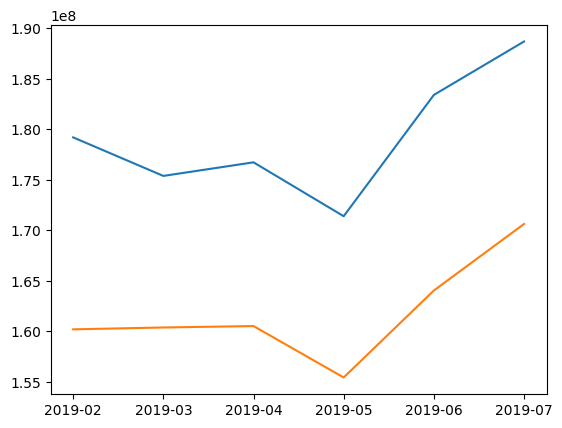

In [72]:
plt.plot(group_data)
plt.show()

In [73]:
total_df

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,2019-02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,2019-02
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000,2019-07
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000,2019-07
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000,2019-07
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000,2019-07


### apply()
1. 스리즈의 형태의 데이터에서 각 항목들을 하나씩 함수에 대입하여 결과값을 스리즈의 형태로 리턴 함수
2. apply(일반함수), apply(lambda함수)

#### 예제3
1. total_df에서 gender 컬럼의 값들의 데이터를 확인
2. M, F, NaN 데이터가 있는 것을 확인
3. M은 남자, F는 여자, NaN는 무응답 으로 데이터를 변경(apply 사용)

In [74]:
total_df['gender']

0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

In [75]:
## 결측치 확인
total_df['gender'].isna().sum()

1075

In [76]:
## 데이터의 분포
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [77]:
total_df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [80]:
### gender 컬럼의 데이터를 m는 남자 f는 여자 NaN 무응답 변경

## case1(apply와 일반함수)
def change(x):
    # print(x)
    # return x
    if x == 'M':
        result = '남자'
        # return '남자'
    elif x == 'F':
        result = '여자'
        # return '여자'
    else:
        result = '무응답'
        # return '무응답'
    return result

total_df['gender'].apply(change)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [81]:
## case2 (apply lambda함수 사용)
total_df['gender'].apply(
    lambda y : '여자' if (y == 'F') else (
        '남자' if (y == 'M') else '무응답'
    )
)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object